In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv(r"C:\Users\raval\Downloads\1-hr-28-attr.csv")

In [3]:
df

,COLD_BLAST_FLOW_RATE,O2_FLOW,STEAM_FLOW,HOT_BLAST_TEMP,COAL_RATE_TPH,BFG_CO,BFG_CO2,BFG_H2,UPTAKE_TEMP_AVG,LOWER_K,...,Coal_MOIST,I_MOISTURE_COKE,I_SLAGRATE,CIRCUIT_1_HL_MJ_H,CIRCUIT_3_HL_MJ_H,CIRCUIT_4_HL_MJ_H,Burden_CENTRECOKE,Burden_COKE,Burden_NUTCOKE,HM_TEMP (output)
0,302911.9583,32959.49609,0.763950,1233.785329,81.652490,25.047578,24.889152,4.165702,102.222122,1.909478,...,1.0,4.16,302.0,10856.01395,73262.86692,1668.071679,31.833177,90.506092,7.490159,1513.0
1,302640.6354,32967.09147,0.551026,1233.878784,82.018611,24.974657,24.867133,4.180221,106.904976,1.922176,...,1.0,4.16,302.0,10842.15117,72993.25547,1663.412994,31.761896,90.303428,7.473387,1513.0
2,303027.4306,32977.47049,0.561247,1233.790378,82.016539,24.947390,24.894878,4.185459,109.067502,1.939587,...,1.0,4.16,302.0,10720.09741,72375.56379,1678.936029,31.718951,90.181331,7.463283,1513.0
3,302369.7174,32994.57878,0.553221,1233.772082,82.066936,24.953178,24.923421,4.193519,110.685558,1.939056,...,1.0,4.16,302.0,10641.45561,71987.54477,1689.258935,31.661919,90.019180,7.449863,1513.0
4,301574.4073,32918.77467,0.521848,1233.764722,81.996269,24.904659,24.936720,4.198546,110.698501,1.946472,...,1.0,4.16,302.0,10588.11696,71853.78310,1752.564317,31.604670,89.856415,7.436393,1513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

COLD_BLAST_FLOW_RATE    7259
O2_FLOW                 7259
STEAM_FLOW              7259
HOT_BLAST_TEMP          7259
COAL_RATE_TPH           7259
BFG_CO                  7259
BFG_CO2                 7259
BFG_H2                  7259
UPTAKE_TEMP_AVG         7259
LOWER_K                 7259
MIDDLE_K                7259
UPPER_K                 7259
HOT_BLAST_PRESSURE      7259
Coke_ASH                7259
Coke_MOISTURE           7259
Coke_VM                 7259
Coal_ASH                7259
Coal_VM                 7259
Coal_MOIST              7259
I_MOISTURE_COKE         7259
I_SLAGRATE              7259
CIRCUIT_1_HL_MJ_H       7259
CIRCUIT_3_HL_MJ_H       7259
CIRCUIT_4_HL_MJ_H       7259
Burden_CENTRECOKE       5919
Burden_COKE             5919
Burden_NUTCOKE          5919
HM_TEMP (output)        7259
dtype: int64

In [5]:
df1=df.dropna(how="any")

In [6]:
df1

,COLD_BLAST_FLOW_RATE,O2_FLOW,STEAM_FLOW,HOT_BLAST_TEMP,COAL_RATE_TPH,BFG_CO,BFG_CO2,BFG_H2,UPTAKE_TEMP_AVG,LOWER_K,...,Coal_MOIST,I_MOISTURE_COKE,I_SLAGRATE,CIRCUIT_1_HL_MJ_H,CIRCUIT_3_HL_MJ_H,CIRCUIT_4_HL_MJ_H,Burden_CENTRECOKE,Burden_COKE,Burden_NUTCOKE,HM_TEMP (output)
0,302911.9583,32959.49609,0.763950,1233.785329,81.652490,25.047578,24.889152,4.165702,102.222122,1.909478,...,1.000000,4.160000,302.000000,10856.01395,73262.86692,1668.071679,31.833177,90.506092,7.490159,1513.000000
1,302640.6354,32967.09147,0.551026,1233.878784,82.018611,24.974657,24.867133,4.180221,106.904976,1.922176,...,1.000000,4.160000,302.000000,10842.15117,72993.25547,1663.412994,31.761896,90.303428,7.473387,1513.000000
2,303027.4306,32977.47049,0.561247,1233.790378,82.016539,24.947390,24.894878,4.185459,109.067502,1.939587,...,1.000000,4.160000,302.000000,10720.09741,72375.56379,1678.936029,31.718951,90.181331,7.463283,1513.000000
3,302369.7174,32994.57878,0.553221,1233.772082,82.066936,24.953178,24.923421,4.193519,110.685558,1.939056,...,1.000000,4.160000,302.000000,10641.45561,71987.54477,1689.258935,31.661919,90.019180,7.449863,1513.000000
4,301574.4073,32918.77467,0.521848,1233.764722,81.996269,24.904659,24.936720,4.198546,110.698501,1.946472,...,1.000000,4.160000,302.000000,10588.11696,71853.78310,1752.564317,31.604670,89.856415,7.436393,1513.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17251,284590.1273,34040.88585,0.000000,1225.885356,85.361210,24.329935,26.590118,3.745831,95.913918,1.595659,...,0.866667,3.601046,318.627451,12987.58294,78398.74118,792.921155,27.914972,86.013218,6.562633,1504.735294
17252,284364.2820,33996.35284,0.000000,1225.925444,85.495514,24.316337,26.600471,3.744929,96.007751,1.598816,...,0.866667,3.590065,318.039216,13002.43027,78191.31207,786.846822,27.917566,86.022590,6.564396,1504.558824
17253,284093.9300,33934.06729,0.000000,1225.772797,85.626867,24.306984,26.607147,3.747194,96.412310,1.602698,...,0.866667,3.579085,317.450980,13015.30341,78033.19558,783.163908,27.913664,86.012366,6.564983,1504.382353
17254,283858.0951,33869.54105,0.000000,1226.103675,85.650406,24.311592,26.608324,3.746694,96.040124,1.604384,...,0.866667,3.568105,316.862745,13029.43120,77810.67645,782.631573,27.899754,85.971766,6.563603,1504.205882


In [1]:
17369-10110

7259

In [7]:
df1.isnull().sum()

COLD_BLAST_FLOW_RATE    0
O2_FLOW                 0
STEAM_FLOW              0
HOT_BLAST_TEMP          0
COAL_RATE_TPH           0
BFG_CO                  0
BFG_CO2                 0
BFG_H2                  0
UPTAKE_TEMP_AVG         0
LOWER_K                 0
MIDDLE_K                0
UPPER_K                 0
HOT_BLAST_PRESSURE      0
Coke_ASH                0
Coke_MOISTURE           0
Coke_VM                 0
Coal_ASH                0
Coal_VM                 0
Coal_MOIST              0
I_MOISTURE_COKE         0
I_SLAGRATE              0
CIRCUIT_1_HL_MJ_H       0
CIRCUIT_3_HL_MJ_H       0
CIRCUIT_4_HL_MJ_H       0
Burden_CENTRECOKE       0
Burden_COKE             0
Burden_NUTCOKE          0
HM_TEMP (output)        0
dtype: int64

In [8]:
df2= df.dropna(how="all")

In [9]:
df2.isnull().sum()

COLD_BLAST_FLOW_RATE    1340
O2_FLOW                 1340
STEAM_FLOW              1340
HOT_BLAST_TEMP          1340
COAL_RATE_TPH           1340
BFG_CO                  1340
BFG_CO2                 1340
BFG_H2                  1340
UPTAKE_TEMP_AVG         1340
LOWER_K                 1340
MIDDLE_K                1340
UPPER_K                 1340
HOT_BLAST_PRESSURE      1340
Coke_ASH                1340
Coke_MOISTURE           1340
Coke_VM                 1340
Coal_ASH                1340
Coal_VM                 1340
Coal_MOIST              1340
I_MOISTURE_COKE         1340
I_SLAGRATE              1340
CIRCUIT_1_HL_MJ_H       1340
CIRCUIT_3_HL_MJ_H       1340
CIRCUIT_4_HL_MJ_H       1340
Burden_CENTRECOKE          0
Burden_COKE                0
Burden_NUTCOKE             0
HM_TEMP (output)        1340
dtype: int64

In [14]:
# df2.
# plt.hist(df2)

In [13]:
df2.corr()

,COLD_BLAST_FLOW_RATE,O2_FLOW,STEAM_FLOW,HOT_BLAST_TEMP,COAL_RATE_TPH,BFG_CO,BFG_CO2,BFG_H2,UPTAKE_TEMP_AVG,LOWER_K,...,Coal_MOIST,I_MOISTURE_COKE,I_SLAGRATE,CIRCUIT_1_HL_MJ_H,CIRCUIT_3_HL_MJ_H,CIRCUIT_4_HL_MJ_H,Burden_CENTRECOKE,Burden_COKE,Burden_NUTCOKE,HM_TEMP (output)
COLD_BLAST_FLOW_RATE,1.000000,-0.010958,0.139637,-0.081492,0.073685,0.356782,-0.202152,-0.143543,-0.034566,0.262177,...,0.271680,0.163504,-0.170406,-0.371617,-0.199125,-0.110019,0.003997,0.020129,0.003598,0.036953
O2_FLOW,-0.010958,1.000000,-0.590112,0.302970,0.721967,0.068996,0.177600,0.137332,-0.203274,-0.105957,...,-0.011494,0.067004,-0.212224,-0.020926,-0.039098,-0.018176,-0.084987,-0.093912,-0.078258,0.106427
STEAM_FLOW,0.139637,-0.590112,1.000000,-0.283687,-0.764798,0.190794,-0.300877,-0.177205,0.207668,0.257848,...,0.041269,0.165334,0.039230,-0.176092,0.154627,-0.163693,0.107458,0.127908,0.098251,0.021905
HOT_BLAST_TEMP,-0.081492,0.302970,-0.283687,1.000000,0.230151,-0.069847,-0.126590,0.283015,-0.189024,-0.039931,...,0.099956,0.031049,-0.218873,0.285060,-0.130079,-0.020392,-0.213495,-0.223469,-0.206931,0.138474
COAL_RATE_TPH,0.073685,0.721967,-0.764798,0.230151,1.000000,-0.064117,0.245734,0.244304,-0.026542,-0.037642,...,0.082392,0.043888,-0.250475,-0.176788,-0.091930,0.092325,-0.133233,-0.152947,-0.121085,-0.068579
BFG_CO,0.356782,0.068996,0.190794,-0.069847,-0.064117,1.000000,0.107648,-0.018207,0.155885,0.190541,...,0.038580,0.228827,0.078838,-0.328035,-0.024963,0.021960,-0.004544,0.010253,-0.000396,0.004822
BFG_CO2,-0.202152,0.177600,-0.300877,-0.126590,0.245734,0.107648,1.000000,-0.034380,0.013288,0.065123,...,-0.191051,-0.202844,0.248313,0.139261,0.040593,0.336872,-0.024357,-0.042971,-0.016650,0.001220
BFG_H2,-0.143543,0.137332,-0.177205,0.283015,0.244304,-0.018207,-0.034380,1.000000,0.323161,-0.470417,...,0.258751,-0.000168,-0.031584,0.223424,0.075339,0.343921,-0.008441,-0.010312,-0.006525,-0.061767
UPTAKE_TEMP_AVG,-0.034566,-0.203274,0.207668,-0.189024,-0.026542,0.155885,0.013288,0.323161,1.000000,-0.028808,...,0.136229,-0.020514,-0.142743,-0.085800,0.191052,0.566904,0.009938,0.009591,0.016979,-0.084024
LOWER_K,0.262177,-0.105957,0.257848,-0.039931,-0.037642,0.190541,0.065123,-0.470417,-0.028808,1.000000,...,-0.011575,0.248575,-0.087517,-0.318603,-0.131687,-0.144687,-0.048012,-0.050110,-0.044406,0.004419


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the data
normalized_data = scaler.fit_transform(df2)

In [18]:
# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df2.columns)

# Display the normalized DataFrame
print(normalized_df)

       COLD_BLAST_FLOW_RATE   O2_FLOW  STEAM_FLOW  HOT_BLAST_TEMP  \
0                  2.403833 -0.173078    0.163920       -0.042886   
1                  2.344616 -0.168986   -0.016838       -0.031649   
2                  2.429035 -0.163394   -0.008161       -0.042279   
3                  2.285488 -0.154176   -0.014975       -0.044479   
4                  2.111911 -0.195018   -0.041609       -0.045364   
...                     ...       ...         ...             ...   
11445             -1.594927  0.409555   -0.484623       -0.992803   
11446             -1.644218  0.385562   -0.484623       -0.987983   
11447             -1.703222  0.352003   -0.484623       -1.006338   
11448             -1.754694  0.317238   -0.484623       -0.966552   
11449             -1.767467  0.291281   -0.484623       -0.969998   

       COAL_RATE_TPH    BFG_CO   BFG_CO2    BFG_H2  UPTAKE_TEMP_AVG   LOWER_K  \
0           0.480999  0.459759 -0.343654  0.383270        -0.163840  2.433429   
1        

In [19]:
normalized_df.corr()

,COLD_BLAST_FLOW_RATE,O2_FLOW,STEAM_FLOW,HOT_BLAST_TEMP,COAL_RATE_TPH,BFG_CO,BFG_CO2,BFG_H2,UPTAKE_TEMP_AVG,LOWER_K,...,Coal_MOIST,I_MOISTURE_COKE,I_SLAGRATE,CIRCUIT_1_HL_MJ_H,CIRCUIT_3_HL_MJ_H,CIRCUIT_4_HL_MJ_H,Burden_CENTRECOKE,Burden_COKE,Burden_NUTCOKE,HM_TEMP (output)
COLD_BLAST_FLOW_RATE,1.000000,-0.010958,0.139637,-0.081492,0.073685,0.356782,-0.202152,-0.143543,-0.034566,0.262177,...,0.271680,0.163504,-0.170406,-0.371617,-0.199125,-0.110019,0.003997,0.020129,0.003598,0.036953
O2_FLOW,-0.010958,1.000000,-0.590112,0.302970,0.721967,0.068996,0.177600,0.137332,-0.203274,-0.105957,...,-0.011494,0.067004,-0.212224,-0.020926,-0.039098,-0.018176,-0.084987,-0.093912,-0.078258,0.106427
STEAM_FLOW,0.139637,-0.590112,1.000000,-0.283687,-0.764798,0.190794,-0.300877,-0.177205,0.207668,0.257848,...,0.041269,0.165334,0.039230,-0.176092,0.154627,-0.163693,0.107458,0.127908,0.098251,0.021905
HOT_BLAST_TEMP,-0.081492,0.302970,-0.283687,1.000000,0.230151,-0.069847,-0.126590,0.283015,-0.189024,-0.039931,...,0.099956,0.031049,-0.218873,0.285060,-0.130079,-0.020392,-0.213495,-0.223469,-0.206931,0.138474
COAL_RATE_TPH,0.073685,0.721967,-0.764798,0.230151,1.000000,-0.064117,0.245734,0.244304,-0.026542,-0.037642,...,0.082392,0.043888,-0.250475,-0.176788,-0.091930,0.092325,-0.133233,-0.152947,-0.121085,-0.068579
BFG_CO,0.356782,0.068996,0.190794,-0.069847,-0.064117,1.000000,0.107648,-0.018207,0.155885,0.190541,...,0.038580,0.228827,0.078838,-0.328035,-0.024963,0.021960,-0.004544,0.010253,-0.000396,0.004822
BFG_CO2,-0.202152,0.177600,-0.300877,-0.126590,0.245734,0.107648,1.000000,-0.034380,0.013288,0.065123,...,-0.191051,-0.202844,0.248313,0.139261,0.040593,0.336872,-0.024357,-0.042971,-0.016650,0.001220
BFG_H2,-0.143543,0.137332,-0.177205,0.283015,0.244304,-0.018207,-0.034380,1.000000,0.323161,-0.470417,...,0.258751,-0.000168,-0.031584,0.223424,0.075339,0.343921,-0.008441,-0.010312,-0.006525,-0.061767
UPTAKE_TEMP_AVG,-0.034566,-0.203274,0.207668,-0.189024,-0.026542,0.155885,0.013288,0.323161,1.000000,-0.028808,...,0.136229,-0.020514,-0.142743,-0.085800,0.191052,0.566904,0.009938,0.009591,0.016979,-0.084024
LOWER_K,0.262177,-0.105957,0.257848,-0.039931,-0.037642,0.190541,0.065123,-0.470417,-0.028808,1.000000,...,-0.011575,0.248575,-0.087517,-0.318603,-0.131687,-0.144687,-0.048012,-0.050110,-0.044406,0.004419


In [20]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COLD_BLAST_FLOW_RATE  10110 non-null  float64
 1   O2_FLOW               10110 non-null  float64
 2   STEAM_FLOW            10110 non-null  float64
 3   HOT_BLAST_TEMP        10110 non-null  float64
 4   COAL_RATE_TPH         10110 non-null  float64
 5   BFG_CO                10110 non-null  float64
 6   BFG_CO2               10110 non-null  float64
 7   BFG_H2                10110 non-null  float64
 8   UPTAKE_TEMP_AVG       10110 non-null  float64
 9   LOWER_K               10110 non-null  float64
 10  MIDDLE_K              10110 non-null  float64
 11  UPPER_K               10110 non-null  float64
 12  HOT_BLAST_PRESSURE    10110 non-null  float64
 13  Coke_ASH              10110 non-null  float64
 14  Coke_MOISTURE         10110 non-null  float64
 15  Coke_VM            

In [22]:
# Calculate the correlation matrix with the target variable
correlation_matrix = normalized_df.corr()

# Select the top 10 correlations with the target variable (in this case)
top_10_correlations = correlation_matrix['HM_TEMP (output)'].abs().nlargest(11)  # Change 'Target' to your target variable

# Print the top 10 correlations
print(top_10_correlations)

HM_TEMP (output)      1.000000
CIRCUIT_3_HL_MJ_H     0.159225
HOT_BLAST_TEMP        0.138474
Coke_MOISTURE         0.111015
O2_FLOW               0.106427
HOT_BLAST_PRESSURE    0.093482
UPTAKE_TEMP_AVG       0.084024
COAL_RATE_TPH         0.068579
BFG_H2                0.061767
Coal_ASH              0.054958
MIDDLE_K              0.046372
Name: HM_TEMP (output), dtype: float64


In [25]:
import seaborn as sns

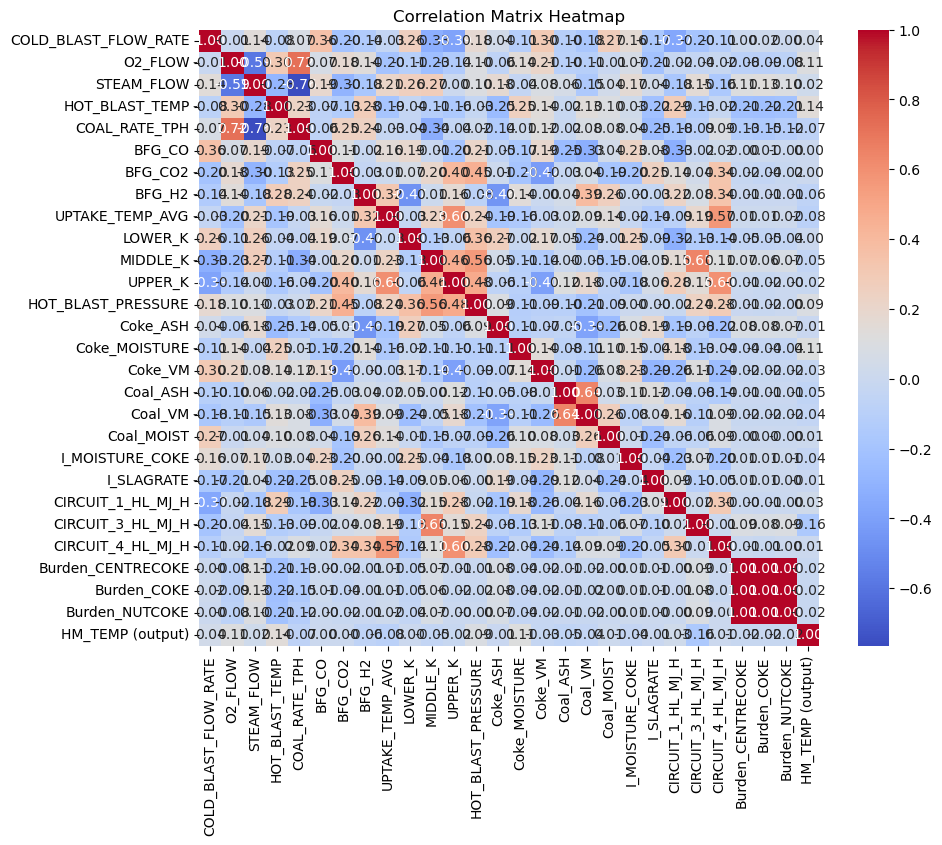

In [30]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

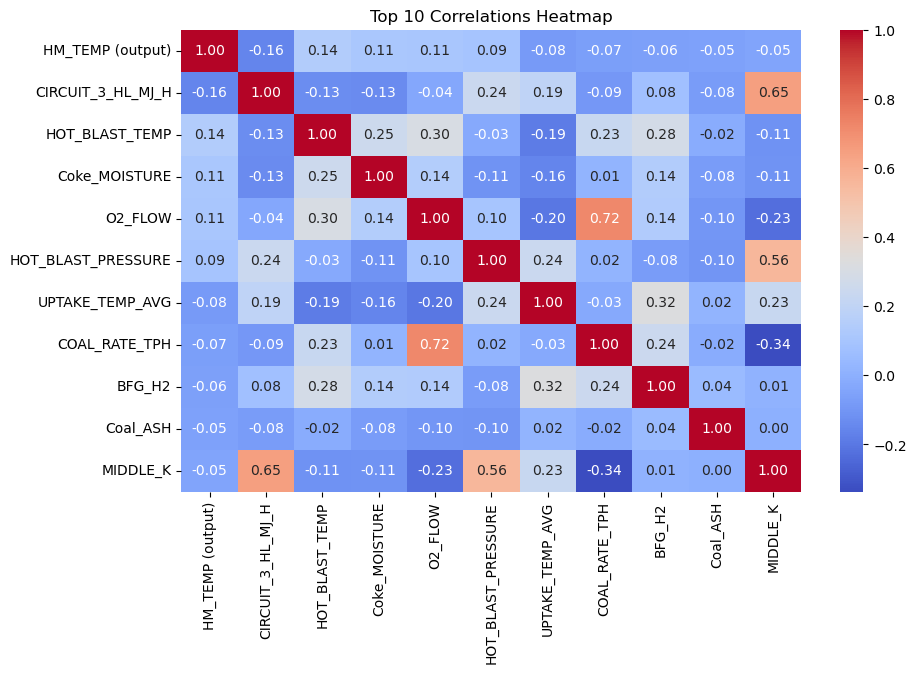

In [29]:
# Select the top 10 correlated feature names
top_10_feature = top_10_correlations.index.tolist()

# Create a subset of the correlation matrix for the top 10 correlations
top_10_correlation_matrix = correlation_matrix.loc[top_10_feature, top_10_feature]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 10 Correlations Heatmap")
plt.show()